<a href="https://colab.research.google.com/github/rabastos44/Bootcamp-Data-Science-Alura/blob/master/projeto_ricardo_bastos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Modulo 3  

Analisar a incidência do consumo de Álcool e outras Drogas entre os alunos da Base Pense 2015.
Vamos analisar:
-  o inicio do uso e o uso nos ultimos 30 dias por idade e tipo de instituição (Escola publica ou privada)
- influências dos amigos
- impacto da violência dentro de casa 
- impacto do bulling no consumo
- influencia de emprego e do esporte 

Realizar teste das diferenças não visívies e das visíveis quando interessante

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Funções

In [2]:
def tabela_de_frequencia_qualitativa(dados):
  tamanho_amostra = len(dados)

  frequencia = dados.value_counts()
  percentual = dados.value_counts(normalize = True) * 100
  dist_freq = pd.DataFrame({"Frequência": frequencia, "Percentual": percentual })
  return dist_freq


### Analises

In [3]:
import pandas as pd
import seaborn as sns
from zipfile import ZipFile

In [4]:
caminho = "/content/drive/MyDrive/PeNSE_2015_AMOSTRA2.zip"
zip = ZipFile(caminho)
caminho_pasta_zipada = zip.namelist()[1]

dados = pd.read_csv(zip.open(caminho_pasta_zipada), sep = ";", thousands = ".", decimal = ",")

In [5]:
tabela_de_frequencia_qualitativa(dados["V0007"])

,Frequência,Percentual
1,12381,74.782556
2,4175,25.217444


In [18]:
uso_drogas_idade_sexo= pd.crosstab(index = [dados.VB01003,dados.VB01001],
              columns = dados.VB06001,
              colnames = ["jÁ Usou alguma droga?"], normalize="index" )

uso_drogas_idade_sexo = uso_drogas_idade_sexo.reset_index()
uso_drogas_idade_sexo.columns = ["Idade","Sexo","Pulo","Sim","Não","NI"]


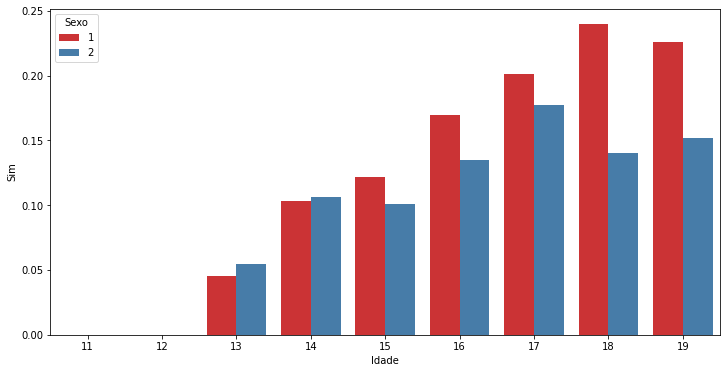

In [21]:
ax = sns.barplot(data = uso_drogas_idade_sexo, 
                 hue = "Sexo", x = "Idade", 
                 y = "Sim", palette="Set1")
ax.figure.set_size_inches(12,6)